<h2> Drought Maps for August 2018 - Colorado </h2>
<p> Documenting the Plan for Creating Maps related to Colorado</p> 
<p> Goal: Create a Map of What cities and Indian Reservations are impacted by the drought levels that occured in August of 2018.</p>

<h1> Data Collected </h1> 
<p> Current Data Consists of: </p> 
<ol> 
    <li> Colorado City Boundries from CDPHE site</li> 
    <li> US State Boundaries </li> 
</ol>

In [3]:
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt 
from shapely.geometry import Point, Polygon
from shapely.geometry import mapping
import shapely.speedups
import timeit

In [82]:
# import CO Data and start to see what you can do with it 
Drought_Pop = gpd.read_file(r"C:\Users\rstev\OneDrive\Desktop\Desktop Folder\NMPlus\map674-drought-map\Drought_Data_18_19\Boundries\Places_Updated\AS1317_Place.shp")
Drought_Pop.head()

,OBJECTID,STATEFP,PLACEFP,PLACENS,GEOID,NAME,NAMELSAD,geonum,pop1317,hispanic,...,mv100k_150,mv150k_200,mv200k_250,mv250k_300,mv300k_400,mv400k_500,mv500k_750,mv750k_1m,mv_1m_plus,geometry
0,1,08,08070,02411713,0808070,Bow Mar,Bow Mar town,10808070,950,33,...,17,15,12,12,4,12,15,30,28,"POLYGON ((-105.059541 39.63537500000001, -105...."
1,2,08,13845,02409443,0813845,Cherry Hills Village,Cherry Hills Village city,10813845,6542,177,...,27,21,18,10,21,19,40,77,135,"POLYGON ((-104.978568 39.62588299999999, -104...."
2,3,08,34960,02412738,0834960,Haxtun,Haxtun town,10834960,881,13,...,20,20,23,7,10,12,12,12,12,"POLYGON ((-102.638535 40.64327300000002, -102...."
3,4,08,57245,02413107,0857245,Paoli,Paoli town,10857245,72,0,...,12,12,12,3,12,12,12,12,12,"POLYGON ((-102.480408 40.61412999999993, -102...."
4,5,08,16385,02413232,0816385,Columbine Valley,Columbine Valley town,10816385,1165,13,...,17,17,5,8,10,12,39,30,22,POLYGON ((-105.0471880000001 39.58978700000006...


In [83]:
Drought_Pop.drop(['NAMELSAD', 'geonum'], axis=1)

,OBJECTID,STATEFP,PLACEFP,PLACENS,GEOID,NAME,pop1317,hispanic,white_nh,black_nh,...,mv100k_150,mv150k_200,mv200k_250,mv250k_300,mv300k_400,mv400k_500,mv500k_750,mv750k_1m,mv_1m_plus,geometry
0,1,08,08070,02411713,0808070,Bow Mar,950,33,882,0,...,17,15,12,12,4,12,15,30,28,"POLYGON ((-105.059541 39.63537500000001, -105...."
1,2,08,13845,02409443,0813845,Cherry Hills Village,6542,177,6033,38,...,27,21,18,10,21,19,40,77,135,"POLYGON ((-104.978568 39.62588299999999, -104...."
2,3,08,34960,02412738,0834960,Haxtun,881,13,836,1,...,20,20,23,7,10,12,12,12,12,"POLYGON ((-102.638535 40.64327300000002, -102...."
3,4,08,57245,02413107,0857245,Paoli,72,0,72,0,...,12,12,12,3,12,12,12,12,12,"POLYGON ((-102.480408 40.61412999999993, -102...."
4,5,08,16385,02413232,0816385,Columbine Valley,1165,13,1127,8,...,17,17,5,8,10,12,39,30,22,POLYGON ((-105.0471880000001 39.58978700000006...
5,6,08,28105,02412649,0828105,Foxfield,710,27,603,36,...,17,13,3,12,8,22,30,21,13,"POLYGON ((-104.802112 39.59493800000001, -104...."
6,7,08,30340,02410598,0830340,Glendale,5027,1104,3023,377,...,48,35,26,54,17,15,17,16,17,"(POLYGON ((-104.929269 39.702021, -104.929129 ..."
7,8,08,69645,02411885,0869645,Sheridan,6018,2577,3061,160,...,89,75,94,81,42,17,14,17,17,"POLYGON ((-105.03473 39.63533200000001, -105.0..."
8,9,08,12815,02409422,0812815,Centennial,108448,8989,87802,2769,...,133,192,288,407,514,424,294,124,68,"POLYGON ((-104.988352 39.58787299999995, -104...."
9,10,08,37270,02410781,0837270,Holyoke,2316,832,1421,8,...,50,44,27,21,16,17,11,12,12,"POLYGON ((-102.321413 40.59301800000003, -102...."


In [6]:
#Import and Filter Data for CO

CO_State = gpd.read_file(r"C:\Users\rstev\OneDrive\Desktop\Desktop Folder\NMPlus\map674-drought-map\Drought_Data_18_19\states_21basic\states.shp")
CO_State.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,(POLYGON ((-160.0738033454681 22.0041773479577...
1,Washington,2,53,Pacific,WA,(POLYGON ((-122.4020153103835 48.2252163723779...
2,Montana,3,30,Mountain,MT,POLYGON ((-111.4754253002074 44.70216236909688...
3,Maine,4,23,New England,ME,(POLYGON ((-69.77727626137293 44.0741483685119...
4,North Dakota,5,38,West North Central,ND,POLYGON ((-98.73043728833767 45.93827137024809...


In [7]:
CO = CO_State[CO_State.STATE_FIPS == "08"]
CO.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
31,Colorado,32,08,Mountain,CO,POLYGON ((-102.0444562914241 37.64147436252109...


In [8]:
#Look at just the Population Data for CO Muncipalities 
Pop = Drought_Pop.filter(["NAME","pop1317", "hispanic", "white_nh", "black_nh", "ntvam_nh", "asain_nh", "hawpi_nh", "other_nh", "geometry"])
Pop.head()

,NAME,pop1317,hispanic,white_nh,black_nh,ntvam_nh,hawpi_nh,other_nh,geometry
0,Bow Mar,950.0,33.0,882.0,0.0,9.0,0.0,0.0,"POLYGON ((-105.059541 39.63537500000001, -105...."
1,Cherry Hills Village,6542.0,177.0,6033.0,38.0,44.0,0.0,0.0,"POLYGON ((-104.978568 39.62588299999999, -104...."
2,Haxtun,881.0,13.0,836.0,1.0,0.0,0.0,0.0,"POLYGON ((-102.638535 40.64327300000002, -102...."
3,Paoli,72.0,0.0,72.0,0.0,0.0,0.0,0.0,"POLYGON ((-102.480408 40.61412999999993, -102...."
4,Columbine Valley,1165.0,13.0,1127.0,8.0,0.0,0.0,0.0,POLYGON ((-105.0471880000001 39.58978700000006...


In [9]:
# we will need to plot this data independently
# Clip the state of Colorado to the Boundries and filter by 1317_pop as the first dataset
CO_Poly = CO.geometry.unary_union
Pop_Clip = Pop[Pop.geometry.intersects(CO_Poly)]

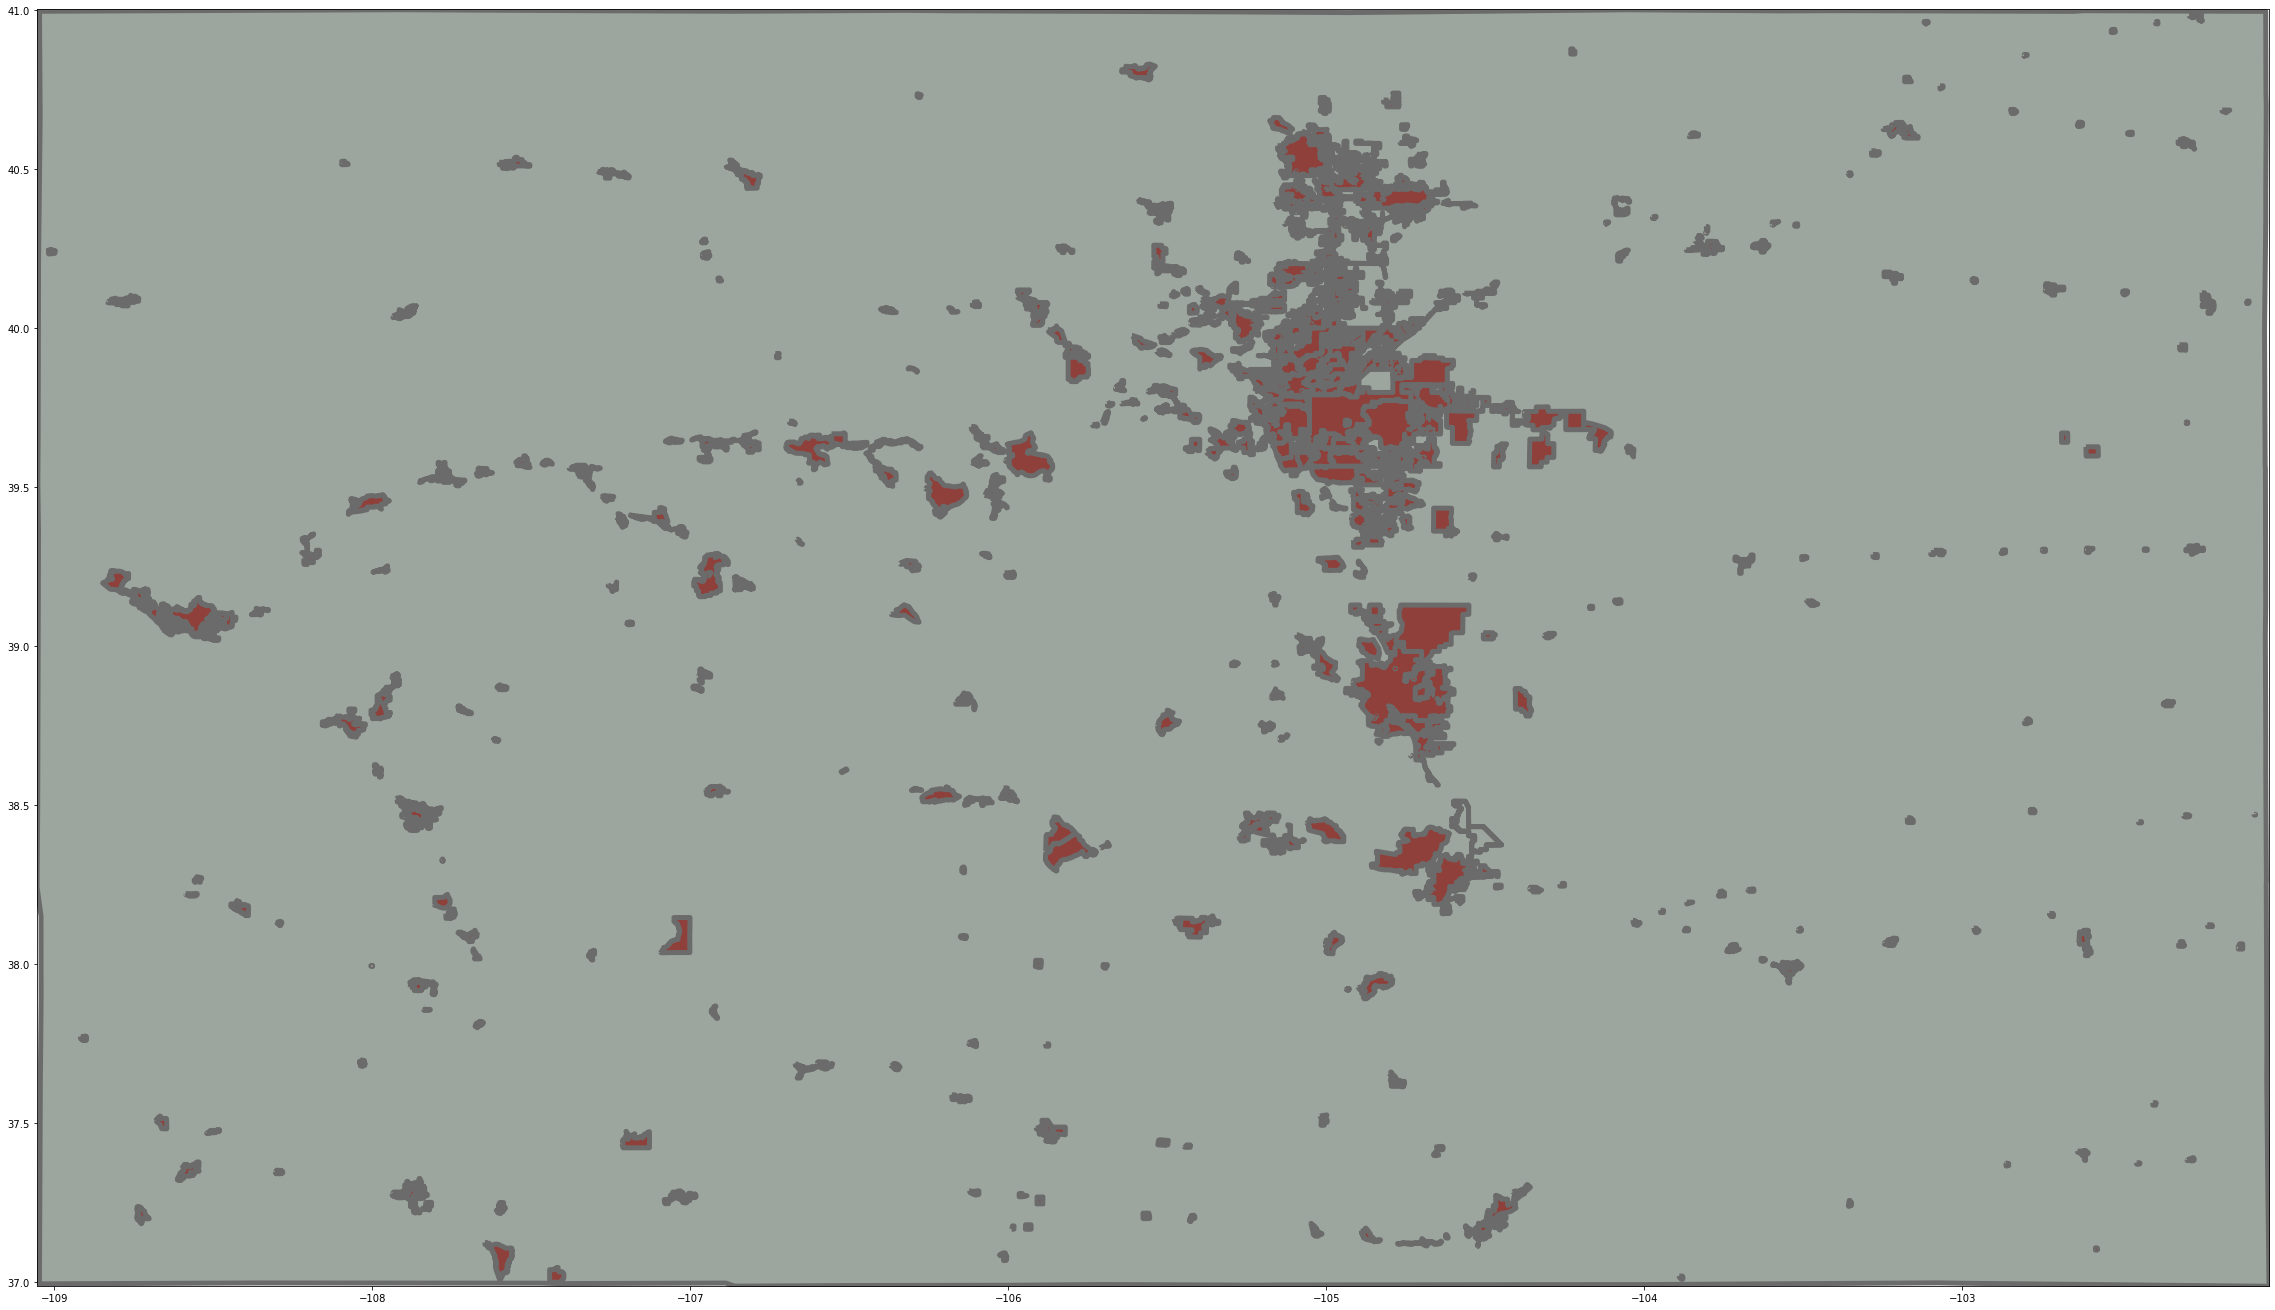

In [13]:
#Plot Population data for each municipality in Colorado 
fig, ax = plt.subplots(figsize=(40,40))

base_color = '#9ca69e'
Edge_Line = '#6b6b6b'
CO.plot(ax=ax, edgecolor = Edge_Line, linewidth=5, color=base_color, zorder=0);
Pop_Clip.plot(ax=ax, edgecolor = Edge_Line, linewidth=5, color='#8f403b', zorder=1);
minx, miny, maxx, maxy = CO.total_bounds
ax.set_xlim(minx, maxx);
ax.set_ylim(miny, maxy); 

<h4> Next Steps: </h4> 
<p> This doesnt quite work the way we want it to so lets lay out the next steps.</p> 
<ol> 
    <li> Get percentages for all of the different racial groups in Colorado to see which groups will be the most impacted.</li> 
    <li> Get percentage for the total of the municipalities throughout CO.</li> 
    <li> Plot Percentages for each of the total and the different racial groups </li> 
</ol> 